In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import altair as alt


In [258]:
# reading the data
data=pd.read_excel('data/Online Retail 2.xlsx',parse_dates=['InvoiceDate'])

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
print('Dataset has',data.shape[0],'rows and',data.shape[1],'columns. Columns are :',list(data.columns))
print('Dataset has',data.shape[0],'rows and',data.shape[1],'columns. Columns are :',list(data.columns))

Dataset has 541909 rows and 8 columns. Columns are : ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [28]:
print('Total number of customers is',len(data.CustomerID.unique()),'from',len(data.Country.unique()),'countries. Total number of products is',len(data.StockCode.unique()))

Total number of customers is 4373 from 38 countries. Total number of products is 4070


In [98]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [104]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [105]:
data=data.dropna()

In [224]:
data=data[(data.Quantity>0) & (data.UnitPrice>0)]
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# Most sold items

In [239]:
most_common_dsc= data.groupby('StockCode').agg({'Quantity':'sum'}).reset_index().sort_values('Quantity',ascending=False).head(5)
most_common_dsc

,StockCode,Quantity
2329,23843,80995
1927,23166,77916
2499,84077,54415
1018,22197,49183
3343,85099B,46181


In [240]:
first=most_common_dsc.StockCode.iloc[0]
second=most_common_dsc.StockCode.iloc[1]
third=most_common_dsc.StockCode.iloc[2]

In [241]:
# Let us check the descriptions of these items

In [242]:
# top items :
print('The most sold items is ',list(data[data.StockCode==first].Description.unique())[0])
print('The second most sold items is ',list(data[data.StockCode==second].Description.unique())[0])
print('The third most sold items is ',list(data[data.StockCode==third].Description.unique())[0])

The most sold items is  PAPER CRAFT , LITTLE BIRDIE
The second most sold items is  MEDIUM CERAMIC TOP STORAGE JAR
The third most sold items is  WORLD WAR 2 GLIDERS ASSTD DESIGNS


# Most expenisve items

In [243]:
most_exp_dsc= data.groupby('StockCode').agg({'UnitPrice':'max'}).reset_index().sort_values('UnitPrice',ascending=False).head(5)
most_exp_dsc

,StockCode,UnitPrice
3664,POST,8142.75
3662,M,4161.06
3661,DOT,1599.26
1292,22502,649.50
1438,22656,295.00


In [244]:
first_exp=most_exp_dsc.StockCode.iloc[0]
second_exp=most_exp_dsc.StockCode.iloc[1]
third_exp=most_exp_dsc.StockCode.iloc[2]

In [245]:
# top items :
print('The most expensive items is ',list(data[data.StockCode==first_exp].Description.unique())[0])
print('The second most expensive items is ',list(data[data.StockCode==second_exp].Description.unique())[0])
print('The third most expensiveitems is ',list(data[data.StockCode==third_exp].Description.unique())[0])

The most expensive items is  POSTAGE
The second most expensive items is  Manual
The third most expensiveitems is  DOTCOM POSTAGE


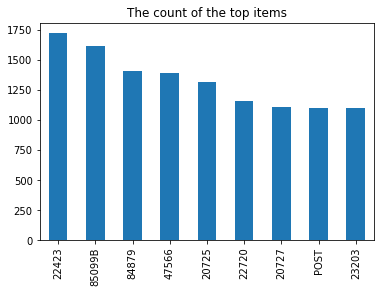

In [246]:
data.StockCode.value_counts(ascending=False)[1:10].plot(title='The count of the top items',kind='bar');

# Countries with most the sold quantities

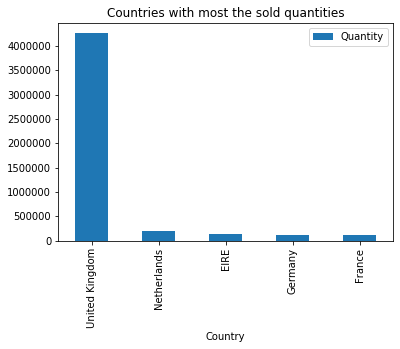

In [247]:
data.groupby('Country').agg({'Quantity':'sum'}).reset_index().sort_values('Quantity',ascending=False).head(5).set_index(
    'Country').plot(title='Countries with most the sold quantities',kind='bar');

In [255]:
post_data = data[data.StockCode.isin(['POST','DOT','M'])]

In [256]:
chart1 = alt.Chart(post_data, title='How price of the most expensive items is changing over time').mark_line().encode(
    x='InvoiceDate:T',
    y='UnitPrice:Q',
    color='StockCode:N'
).properties(
    height=500,
    width=500
)

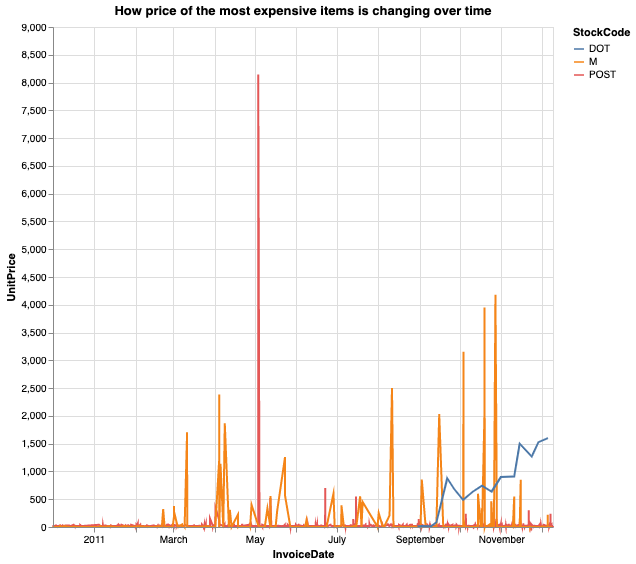

In [257]:
chart1